## **Análise de Risco e Retorno da Carteira**

## 1. Instalando e Importando as Biblotecas

In [ ]:
!pip install investpy
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

## 2. Coletando os Dados

In [ ]:
ativos = ["EQTL3.SA", "ITSA4.SA", "ABEV3.SA", "SULA11.SA", "MYPK3.SA", "BBSE3.SA", "VULC3.SA"]

In [ ]:
data_inicio = '2018-01-01'
data_fim = '2022-04-05'

In [ ]:
preços = pd.DataFrame()

for i in ativos:
  preços[i] = yf.download(i, start = data_inicio, end = data_fim)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# 3. Manipulando o Dataframe

In [ ]:
ativos_retornos = preços.pct_change() # Calcula a alteração percentual da linha imediatamente anterior por padrão
ativos_retornos = ativos_retornos.dropna()

In [ ]:
desvio_padrao = ativos_retornos.std() # calcular o desvio padrão 
media = ativos_retornos.mean() # calcular a média

volatilidade = pd.DataFrame(desvio_padrao, columns=["Vol"])
retorno_medio = pd.DataFrame(media, columns=["Retorno"])

In [ ]:
risco_retorno = pd.concat([volatilidade, retorno_medio], axis=1) # adicionar uma coluna em um dataframe - Axis eixo a ser mexido (1 por tratar-se de uma coluna)

## 4. Criando o Gráfico

[]

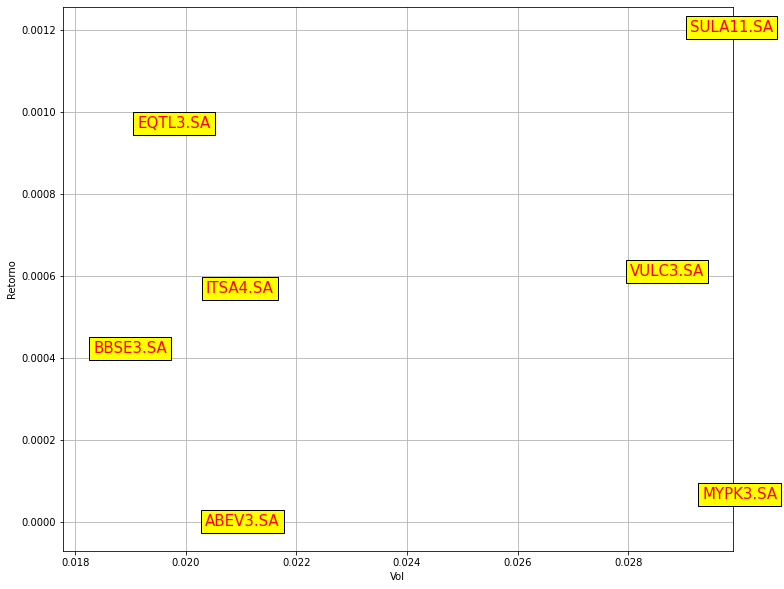

In [ ]:
plt.subplots(figsize=(12,10))

grafico = sns.scatterplot(data = risco_retorno, x = "Vol" , y = "Retorno")

# Fazer a caixa amarela e personalizar fonte
for i in range(risco_retorno.shape[0]):
  plt.text(x = risco_retorno.Vol[i], y = risco_retorno.Retorno[i],
           s = risco_retorno.index[i], 
           fontdict = dict(color = 'red', size = 15),
           bbox = dict(facecolor = 'yellow'))

grafico.grid(True)
grafico.plot()